<a href="https://colab.research.google.com/github/cutiips/A-new-hope/blob/main/No11_LudovicMarquis_JonathanCurty_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importer les librairies

In [1]:
# pour colab
!pip install -r https://raw.githubusercontent.com/cutiips/A-new-hope/main/requirements.txt > /dev/null 2>&1
!pip install scipy
# en local
# !pip install -r requirements.txt

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Importer les données

In [3]:
# en local
# data = pd.read_csv("Data/titanic.csv")
data = pd.read_csv("https://raw.githubusercontent.com/cutiips/A-new-hope/main/Data/titanic.csv") # en ligne (colab)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` avec l'argument `drop_first=True`.

In [4]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:

    """La fonction prépare les données à l'analyse.

    Args:
        data (pd.DataFrame): La dataframe originale

    Returns:
        pd.DataFrame: La dataframe preprocessé et prête à être analysée.
    """

    # Faire une copy de la dataframe originale
    data_preprocessed = data.copy()

    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed = data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

    # Supprimez lignes contenant au moins une valeur manquante
    data_preprocessed = data_preprocessed.dropna()

    # Créer une variable `FamilySize` et supprimez les variables `SibSp` et `Parch`
    data_preprocessed["FamilySize"] = data_preprocessed["SibSp"] + data_preprocessed["Parch"] + 1
    data_preprocessed = data_preprocessed.drop(columns=["SibSp", "Parch"])

    # Recalculer le prix du billet
    data_preprocessed["Fare"] = data_preprocessed["Fare"] / data_preprocessed["FamilySize"]

    # Encode (OHE) `Sex` & `Embarked`
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex", "Embarked"], drop_first=True)


    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."

    return data_preprocessed

Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [5]:
# Preprocess les données à l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,True,False,True
1,1,1,38.0,35.641650,2,False,False,False
2,1,3,26.0,7.925000,1,False,False,True
3,1,1,35.0,26.550000,2,False,False,True
4,0,3,35.0,8.050000,1,True,False,True
...,...,...,...,...,...,...,...,...
885,0,3,39.0,4.854167,6,False,True,False
886,0,2,27.0,13.000000,1,True,False,True
887,1,1,19.0,30.000000,1,False,False,True
889,1,1,26.0,30.000000,1,True,False,False


## 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il le même que l'âge moyen de la population en 1912 (28 ans)?**

***1. Identifier la ou les variables d’intérêt et spécifier le type***

La variable d'intérêt est l'âge des passagers du titanic. C'est une variable de type quantitative continue étant donné qu'elle mesure le temps écoulé depuis la naissance et peut être noté à n'importe quelle précision (jours, mois, années par exemple). Ses valeur admissibles ne sont pas dénombrables car il en existe une infinité.

***2. Réaliser une visualisation appropriée selon les variables***

Les visualisation appropriées pour représenter cette variable sont l'histogramme et le boxplot. Ils permettent de visualiser la distribution des valeurs.

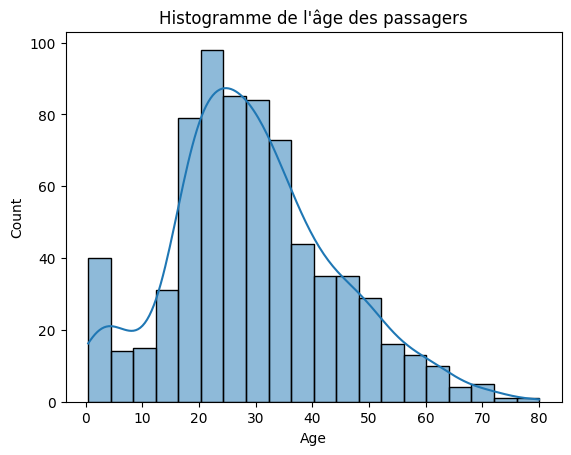

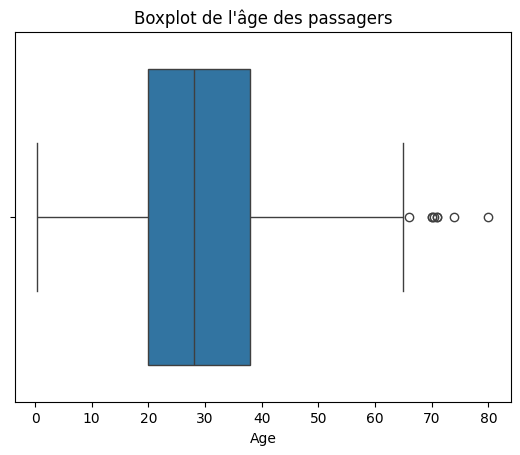

In [6]:
sns.histplot(
    data=data_clean,
    x="Age",
    kde=True
)
plt.title("Histogramme de l'âge des passagers")
plt.show()

sns.boxplot(
    data=data_clean,
    x="Age"
)
plt.title("Boxplot de l'âge des passagers")
plt.show()

***3. Enoncer une hypothèse nulle et alternative***

- **H0 :** l'âge moyen des passagers du titanic est égal à l'âge moyen de la population en 1912 (μ = 28).

- **H1 :** l'âge moyen des passagers du titanic n'est pas égal à l'âge moyen de la population en 1912 (μ ≠ 28).

***4. Identifier le test statistique approprié***
  
Le test approprié est le `t-test` de Student car on procède à une comparaison entre la moyenne d'un échantillon (les passagers du titanic) à une valeur (la moyenne de la population en 1912), soit 28 ans.

Il est supposé que les données suivent la loi normale. Il est également justifié d'utiliser un `t-test` étant donné que l'échantillon est suffisamment grand (> 30).

***5. Vérifier la validation des postulats du t-test***

L'échantillon n'est pas réellement aléatoire car il correspond à une population spécifique, sélectionnée selon certains critères qu'il soit sociaux, économique ou historique. Ceci limite la généralisation des résultats à l'ensemble de la population de 1912.

Avec un échantillon de 712 passagers (> 30), nous pouvons postuler que, malgré une distribution pas optimale (voir histogramme), la validation des postulats du `t-test` peut tout de même être validé.

In [7]:
n = len(data_clean)

print("La taille de l'échantillon est de : " + str(n))

La taille de l'échantillon est de : 712


***6. Calculer la statistique t et la p-valeur***

- Statistiques `t` = `3,02`
- `p-valeur` = `0.0026`

Selon les résultats de l'analyse, nous remarquons que la différence entre la moyenne observée et la moyenne hypothétique est grande.

Le résultat de la p-valeur signifie qu'il existe `0,26 %` de probabilité d'observer une si grande différence entre la moyenne de l'échantillon et 28 ans, si l'hypothèse nulle (`H0`) est vraie.

In [8]:
ages = np.array(data_clean["Age"])

t, p_valeur = stats.ttest_1samp(ages, popmean=28)

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_valeur))

La statistique t est de : 3.0233009800374053
La p-valeur associée est de : 0.002590259537786662


***7. Prendre une décision selon la p-valeur (alpha 5%)***

La `p-valeur` étant `< 0,05`, le résultat du `t-test` est considéré comme statistiquement significatif au seuil alpha 5%.

Ainsi, cela nous permet de rejetter l'hypothèse nulle.

In [9]:
alpha = 0.05

if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypothèse nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypothèse nulle.")

Avec un seuil alpha 0.05 on rejette l'hypothèse nulle.


***8. Interpréter le résultat et évaluer la taille de l’effet***  
  
Les résultats nous montrent que l'âge moyen des passagers du titanic (29,64 ans) n'est pas égal à l'âge moyen de la population en 1912. Ces résultats sont statistiquement significatifs.

Toutefois, le test de Cohen (0,11) indique que l'ampleur de la différence est très faible sur le plan pratique.

Ainsi, bien qu'il y ait une différence son effet est faible.

In [10]:
moyenne_ages = np.mean(ages)
ecart_type_ages = np.std(ages, ddof=1)
d_cohen = (moyenne_ages - 28) / ecart_type_ages

print("La moyenne des âges est de : " + str(moyenne_ages))
print("L'écart-type des âges est de : " + str(ecart_type_ages))
print("Le d de Cohen est de : " + str(d_cohen))

La moyenne des âges est de : 29.64209269662921
L'écart-type des âges est de : 14.49293290032352
Le d de Cohen est de : 0.11330299449551398


**Q2: La survie dépend-elle de la classe du passager?**

***1. Identifier la ou les variables d’intérêt et spécifier le type***

Les variables d'intérêts sont : les chances de survie des passagers (Survived) et la classe dans laquelle ils voyageaient (Pclass).

La première (Survived) est une variable de type qualitative nominale car elle est binaire et exprime une catégorie (mort ou survivant). La seconde (Pclass) est une variable **qualitative ordinale** car elle décrit une catégorie où il y a un ordre hiérarchique logique (1ère > 2ème > 3ème (prix, confort, prestige)).

***2. Réaliser une visualisation appropriée selon les variables***

La visualisation apropriée pour répondre à la question est le diagramme en barre groupées. Il permet de comparer les proportions de survivants et non survivants au sein de chaque classe.

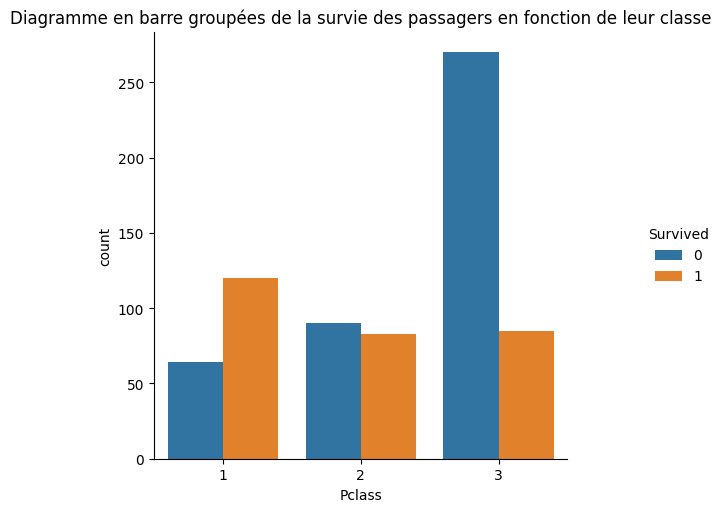

In [11]:
sns.catplot(
    data=data_clean,
    x="Pclass",
    hue="Survived",
    kind="count"
)
plt.title("Diagramme en barre groupées de la survie des passagers en fonction de leur classe")
plt.show()

***3. Enoncer une hypothèse nulle et alternative***
- **H0 :** la survie du passager est indépendante de sa classe  
- **H1 :** la survie du passager n'est pas indépendante de sa classe

***4. Identifier le test statistique approprié***

Le test statistique approprié pour tester la relation entre deux variables **qualitatives** est le test du Chi-2 (`𝜒^2`).

***5. Vérifier la validation des postulats du test de 𝜒^2 d’indépendance***

L'application du Chi-2 (`𝜒^2`) est pertinente car les observations sont indépendantes. De plus, les effectifs attendus dans chaque case du tableau de contigence sont suffisamment grands (`>= 5`).

In [12]:
tab_contingence = pd.crosstab(data_clean["Survived"], data_clean["Pclass"])

print(tab_contingence)


Pclass      1   2    3
Survived              
0          64  90  270
1         120  83   85


***6. Calculer la statistique et la p-valeur***

- Chi-2 = `91,08`
- `p-valeur` = `1,67e-20`

Selon les résultats de l'analyse, nous remarquons que la différence entre les effectifs observés et les effectifs attendus, si les deux variables étaient indépendantes, et très grandes.

Le résultat de la `p-valeur` est très faible. La probabilité d'observer une telle dépendance au sein d'un échantillon aléatoire est donc très petite, si on assume que l'hypothèse nulle (H0) est vraie.

In [13]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(tab_contingence)

print("Chi-2 : " + str(chi2_stat))
print("La p-valeur est de : " + str(p_val))
print("Le degré de liberté est de : " + str(dof))
print("Les valeurs attendues sont : " + str(ex))

Chi-2 : 91.08074548791019
La p-valeur est de : 1.6675060315554636e-20
Le degré de liberté est de : 2
Les valeurs attendues sont : [[109.57303371 103.02247191 211.40449438]
 [ 74.42696629  69.97752809 143.59550562]]


***7. Prendre une décision selon la p-valeur (alpha 5%)***

La p-valeur étant très largement inférieure au seuil de 5%, le résultat du Chi-2 est considéré comme statistiquement significatif. Ainsi, cela nous permet de rejeter l'hypothèse nulle (H0).

In [14]:
if p_val < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypothèse nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypothèse nulle.")

Avec un seuil alpha 0.05 on rejette l'hypothèse nulle.


***8. Interpréter le résultat et évaluer la taille de l’effet***  

Les résultats nous montrent qu'il existe une dépendance statistiquement significative entre la classe du passager et sa survie (voir diagramme en barre groupées).

Le V de Cramer étant de 0,36, cela indique (selon l'étude de Amyotte, 2017) que l'intensité du lien entre les deux variables est très forte.

Ainsi, la classe dans laquelle le passager voyageait a eu un impact significatif et fort sur ses chances de survie.


Source : Amyotte (2017) - https://www.studocu.com/fr-ca/document/universite-de-montreal/introduction-aux-statistiques/aide-memoire-du-livre-stt1901/48217596

In [15]:
v_cramer = np.sqrt(chi2_stat / (len(data_clean) * (min(tab_contingence.shape) - 1)))

print("Le V de Cramer est de : " + str(v_cramer))

Le V de Cramer est de : 0.35766240415815087


**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?**

***1. Identifier la ou les variables d’intérêt et spécifier le type***

Les variables d'intérêts sont l'âge (`Age`) et les chances de survie des passagers (`Survived`). Comme expliqué précédemment, l'âge est une variable **quantitative continue** et les chances de survie sont une variable de type **qualitative nominale**.


***2. Réaliser une visualisation appropriée selon les variables***

La visualisation appropriée pour répondre à la question est le boxplot des âges selon la variable `Survived` car il permet de comparer visuellement la distribution des âges dans chacun des groupes.  

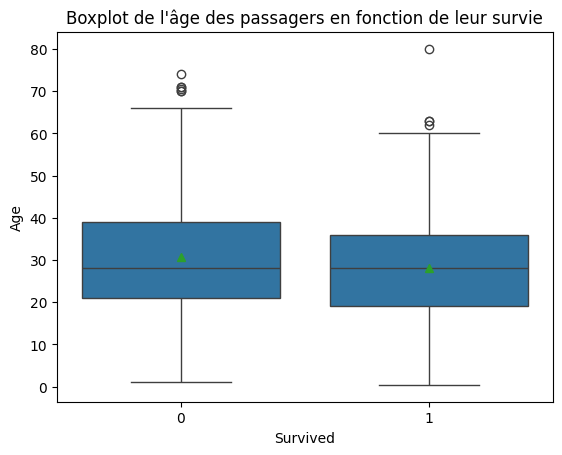

In [16]:
sns.boxplot(
    data=data_clean,
    x="Survived",
    y="Age",
    showmeans=True
)
plt.title("Boxplot de l'âge des passagers en fonction de leur survie")
plt.show()

***3. Enoncer une hypothèse nulle et alternative***

- **H0 :** il n'existe pas de différence d'âges entre les passagers survivants et les passagers décédés.
- **H1 :** il existe une différence d'âges entre les passagers survivants et les passagers décédés.

***4. Identifier le test statistique approprié***
  
Le test approprié est le `t-test` de Student car il permet de comparer les moyennes d'âges des deux groupe qui sont indépendants.

Il est également justifié d'utiliser un `t-test` étant donné que la taille des deux groupes est suffisamment grande (> 30).

***5. Vérifier la validation des postulats du t-test à deux échantillons***

L'échantillon n'est pas réellement aléatoire car il correspond à une population spécifique, sélectionnée selon certains critères qu'il soit sociaux, économique ou historique. Ceci limite la généralisation des résultats à l'ensemble de la population de 1912.

La taille de l'échantillon des passagers n'ayant pas survécu est de `424` alors que la taille de l'échantillon des passagers ayant survécu est de `288`. Ainsi, chacun des échantillons est `> 30`.

In [17]:
n_not_survived = len(data_clean[data_clean["Survived"] == 0])
n_survived = len(data_clean[data_clean["Survived"] == 1])

print("La taille de l'échantillon des passagers n'ayant pas survécu est de : " + str(n_not_survived))
print("La taille de l'échantillon des passagers ayant survécu est de : " + str(n_survived))

La taille de l'échantillon des passagers n'ayant pas survécu est de : 424
La taille de l'échantillon des passagers ayant survécu est de : 288


***6. Calculer la statistique et la p-valeur***

- Statistiques `t` = `2,18`
- `p-valeur` = `0.03`

Selon les résultats de l'analyse, nous remarquons qu'il existe une différence entre l'âge moyen des passagers survivants et des passagers décédés.

Le résultat de la p-valeur signifie que il y a environ 2,93% de probabilités d'observer une différence d'âge aussi marquée, entre survivants et non-survivants, par hasard si l'hypothèse nulle était vraie.

In [18]:
ages_not_survived = np.array(data_clean[data_clean["Survived"] == 0]["Age"])
ages_survived = np.array(data_clean[data_clean["Survived"] == 1]["Age"])

t, p_valeur = stats.ttest_ind(
    ages_not_survived,
    ages_survived,
    alternative="two-sided",
    equal_var=False
)

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_valeur))

La statistique t est de : 2.184486214939826
La p-valeur associée est de : 0.02931497754601072


***7. Prendre une décision selon la p-valeur (alpha 5%)***

La `p-valeur` étant `< 0,05`, le résultat du `t-test` est considéré comme statistiquement significatif au seuil alpha 5%.

Ainsi, cela nous permet de rejetter l'hypothèse nulle, ce qui confirme qu'il y a une différence d'âge entre les deux échantillons.

In [19]:
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypothèse nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypothèse nulle.")

Avec un seuil alpha 0.05 on rejette l'hypothèse nulle.


***8. Interpréter le résultat et évaluer la taille de l’effet***  

Les résultats montrent que la différence de moyenne d'âge entre les survivants (28,19 ans) et les morts (30,63 ans) est statistiquement significative. Toutefois, le test de Cohen (|-0,17|) indique que la taille de l'effet est faible. Ainsi, il y a une différence entre les deux moyennes d'âge mais cet effet sur les chances de survie semble faible.

In [20]:
moyenne_ages_survived = np.mean(ages_survived)
moyenne_ages_not_survived = np.mean(ages_not_survived)
d_cohen = (moyenne_ages_survived - moyenne_ages_not_survived) / ecart_type_ages

print("La moyenne des âges des passagers ayant survécu est de : " + str(moyenne_ages_survived))
print("La moyenne des âges des passagers n'ayant pas survécu est de : " + str(moyenne_ages_not_survived))
print("L'écart-type des âges est de : " + str(ecart_type_ages))
print("Le d de Cohen est de : " + str(d_cohen))

La moyenne des âges des passagers ayant survécu est de : 28.19329861111111
La moyenne des âges des passagers n'ayant pas survécu est de : 30.62617924528302
L'écart-type des âges est de : 14.49293290032352
Le d de Cohen est de : -0.16786668722640677


**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**

***1. Identifier la ou les variables d’intérêt et spécifier le type***
  
Les variables d'intérêts sont l'âge (`Age`) et le prix du billet (`Fare`). Comme expliqué précédemment, l'âge est une variable **quantitative continue**. De même, le prix du billet est également une variable **quantitative continue**, car il représente une quantité mesurable qui peut prendre n'importe quelle valeur.

***2. Réaliser une visualisation appropriée selon les variables***

Étant donné que nous cherchons à savoir s'il existe une relation entre deux variables quantitatives continues, la visualisation appropriée est le nuage de point (scatter plot).

L'axe `y` (`Fare`) est représenté en échelle logarithmique afin de mieux visualiser la répartition des prix en atténuant l'influence des billets très cher.

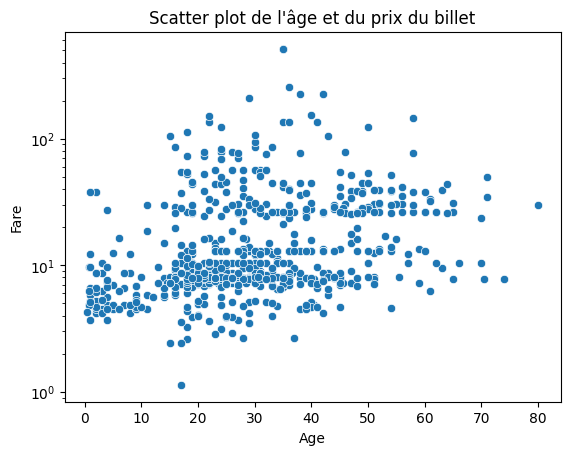

In [21]:
sns.scatterplot(
    data=data_clean,
    x="Age",
    y="Fare"
)
plt.yscale("log")
plt.title("Scatter plot de l'âge et du prix du billet")
plt.show()

***3. Enoncer une hypothèse nulle et alternative***

- **H0 :** il n'existe pas de relations entre l'âge des passagers et le prix du billet (𝜌 = 0)
- **H1 :** il existe une relation entre l'âge des passagers et le prix du billet (𝜌 ≠ 0)

***4. Identifier le test statistique approprié***

Étant donné qu'on ne compare pas des moyennes entre groupes mais qu'on test une relation le `t-test` n'est pas forcément approprié.  

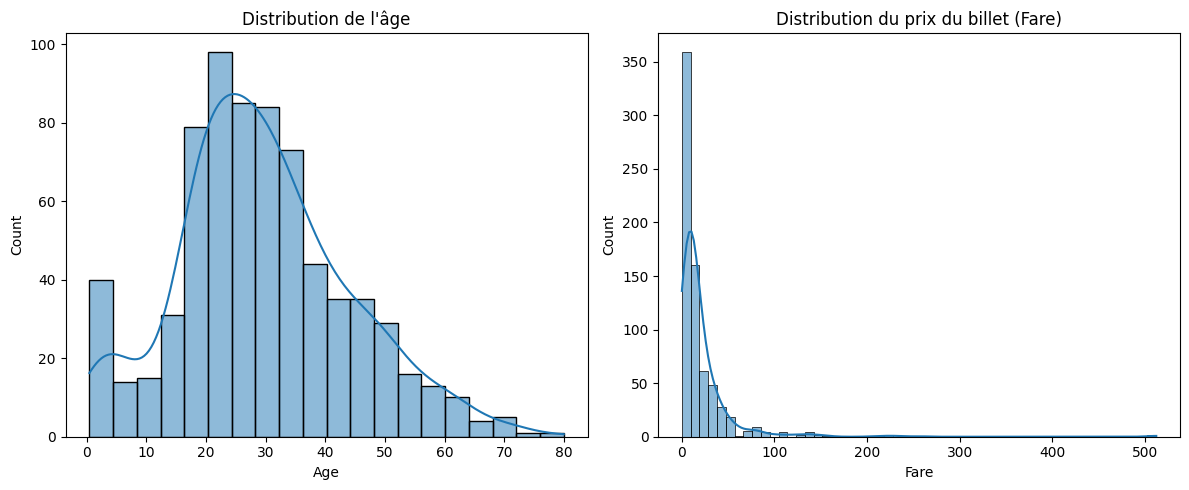

Test de Shapiro-Wilk pour l'âge: Statistique=0.982, p-valeur=7.897e-08
Test de Shapiro-Wilk pour le prix (Fare): Statistique=0.387, p-valeur=1.462e-43


In [22]:
# Import des librairies nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assumant que 'data_clean' est votre DataFrame pré-traité
# 1. Vérification visuelle de la normalité avec des histogrammes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogramme pour l'âge
sns.histplot(data_clean['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribution de l\'âge')

# Histogramme pour le prix du billet (Fare)
sns.histplot(data_clean['Fare'], kde=True, ax=axes[1])
axes[1].set_title('Distribution du prix du billet (Fare)')

plt.tight_layout()
plt.show()

# 2. Test de normalité formel (Shapiro-Wilk)
# H0: La variable suit une loi normale.
# Si p-value < 0.05, on rejette H0.
shapiro_age = stats.shapiro(data_clean['Age'].dropna())
shapiro_fare = stats.shapiro(data_clean['Fare'].dropna())

print(f"Test de Shapiro-Wilk pour l'âge: Statistique={shapiro_age.statistic:.3f}, p-valeur={shapiro_age.pvalue:.3e}")
print(f"Test de Shapiro-Wilk pour le prix (Fare): Statistique={shapiro_fare.statistic:.3f}, p-valeur={shapiro_fare.pvalue:.3e}")

Après avoir déterminé une absence de normalité des deux variables (p < 0.05 au test de Shapiro), nous allons utiliser le test de Spearman.

Il est approprié car il est robuste au distribution asymétrique.

**5. Vérifier la validation des postulats du test de Spearman**

Les variables sont quantitatives, chaque paire est indépendante des autres, et l'échantillon est d'une taille raisonnable.

Le test de Spearman ne requiert pas de relation linéaire, mais évalue la présence d'une relation monotone, même faible. C'est précisément ce que nous cherchons à déterminer avec ce test.

**6. Calculer la statistique et la p-valeur**


Un rho de Spearman de 0,36 indique une association monotone positive faible à modérée entre l'âge et le prix du billet.

La p-valeur étant extrêmement faible, cela nous indique que la corrélation est hautement significative.

Observer un rho aussi élevée par hasard, si aucune relation n'existait est donc pratiquement impossible.

In [23]:
# Calculer la corrélation de Spearman entre 'Age' et 'Fare'
rho, p_value = stats.spearmanr(data_clean['Age'], data_clean['Fare'])

print(f"Coefficient de corrélation de Spearman (rho): {rho:.4f}")
print(f"P-valeur associée: {p_value}")

Coefficient de corrélation de Spearman (rho): 0.3629
P-valeur associée: 1.4026236624202184e-23


***7. Prendre une décision selon la p-valeur (alpha 5%)***

La `p-valeur` étant `< 0,05`, ce résultat est considéré comme statistiquement significatif au seuil alpha de 5%.

Ainsi, cela nous permet de rejetter l'hypothèse nulle et de conclure qu'il existe une association entre l'âge et le prix du billet.

***8. Interpréter le résultat et évaluer la taille de l’effet***  

Les résultats montrent qu'il existe une association positive entre l'âge du passager et le prix du billet. Toutefois, un rho inférieur à 0,5 indique que la relation est plutôt faible à modérée.

Toutefois, l'âge n'explique pas exclusivement le prix du billet.  

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

Nous visons à expliquer la probabilité de survie (Survived) par une régression logistique multivariée, ajustée par maximum de vraisemblance (MLE).

Variables explicatives :

| Variable        | Description                                  | Type                  |
|-----------------|----------------------------------------------|-----------------------|
| Pclass          | Classe socio-économique                      | Numérique ordinale    |
| Age             | Âge en années                                | Quantitative continue |
| Fare            | Tarif du billet                              | Quantitative continue |
| FamilySize      | Taille de la famille                         | Quantitative continue |
| Sex_male        | 1 = homme, 0 = femme                         | Binaire               |
| Embarked_Q      | Embarquement au port Q (1 = oui, 0 = non)    | Binaire               |
| Embarked_S      | Embarquement au port S (1 = oui, 0 = non)    | Binaire (ref = C)     |

In [24]:
print(data_clean.dtypes)

data_clean_reg_log = data_clean.astype({col: 'int' for col in data_clean.select_dtypes(include=['bool']).columns})

X = data_clean_reg_log.drop(columns=["Survived"])
y = data_clean_reg_log["Survived"]

Survived        int64
Pclass          int64
Age           float64
Fare          float64
FamilySize      int64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [25]:
model = sm.Logit(
    y,
    sm.add_constant(X)
)

model_fit = model.fit()

print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.445519
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:                  0.3398
Time:                        14:33:05   Log-Likelihood:                -317.21
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.324e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7251      0.659      8.691      0.000       4.434       7.016
Pclass        -1.1795      0.

In [26]:
coefs = model_fit.params.tolist()

coefs

[5.725098601140174,
 -1.1794912526464787,
 -0.0418315463337772,
 0.0030104675944640324,
 -0.1934093875437263,
 -2.65474610140251,
 -0.8290537688375385,
 -0.4111051053739086]

In [27]:
odds_ratio = np.exp(model_fit.params)

pd.DataFrame(odds_ratio, columns=["Odds Ratio"])

,Odds Ratio
const,306.463481
Pclass,0.307435
Age,0.959031
Fare,1.003015
FamilySize,0.824145
Sex_male,0.070317
Embarked_Q,0.436462
Embarked_S,0.662917


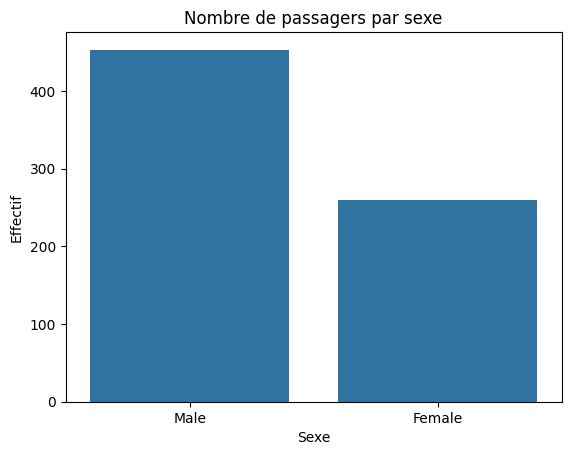

Male/Female ratio = 1.749034749034749


In [28]:
# mappage pour plus de clarté
data_clean['Sex_label'] = data_clean['Sex_male'].map({True: 'Male', False: 'Female'})

# bar chart du nombre de passagers Male vs Female
sns.countplot(data=data_clean, x="Sex_label")
plt.title("Nombre de passagers par sexe")
plt.xlabel("Sexe")
plt.ylabel("Effectif")
plt.show()
#ratio d'homme pour chaque femme
print(
    "Male/Female ratio =",
    data_clean['Sex_male'].value_counts()[True] / data_clean['Sex_male'].value_counts()[False]
)

Le modèle repose sur 712 observations, affiche un pseudo-R² de 0,34 et un test de rapport de vraisemblance hautement significatif (LLR p-value < 10⁻⁶⁶), ce qui témoigne de sa capacité à distinguer passagers survivants et non-survivants.

|    Variable | Coefficient (β) | Erreur-type | z-statistique | p-value | Odds Ratio (e^β) | IC 95 % Odds Ratio |
| ----------: | --------------: | ----------: | ------------: | ------: | ---------------: | -----------------: |
|   Constante |          5,7251 |       0,659 |         8,691 | < 0,001 |            306,5 |   \[84,7 ; 1109,2] |
|      Pclass |         −1,1795 |       0,158 |        −7,472 | < 0,001 |             0,31 |     \[0,23 ; 0,41] |
|         Age |         −0,0418 |       0,008 |        −5,122 | < 0,001 |             0,96 |     \[0,94 ; 0,97] |
|        Fare |          0,0030 |       0,004 |         0,744 |   0,457 |            1,003 |   \[0,995 ; 1,011] |
|  FamilySize |         −0,1934 |       0,074 |        −2,609 |   0,009 |             0,82 |     \[0,71 ; 0,95] |
|   Sex\_male |         −2,6547 |       0,221 |       −12,026 | < 0,001 |             0,07 |     \[0,05 ; 0,09] |
| Embarked\_Q |         −0,8291 |       0,598 |        −1,387 |   0,165 |             0,44 |     \[0,14 ; 1,41] |
| Embarked\_S |         −0,4111 |       0,270 |        −1,521 |   0,128 |             0,66 |     \[0,38 ; 1,13] |


**Effet du rang socio-économique (Pclass)**

Le coefficient négatif (β = −1,18, p < 0,001) se traduit par un odds ratio de 0,31 ; autrement dit, pour chaque passage à la classe inférieure, les chances de survie sont multipliées par ≃ 0,31, soit une division par plus de trois.

Cette amplitude reflète la priorité d’évacuation accordée aux passagers de première classe et l’accès privilégié aux canots.

**Impact de l’âge (Age)**

L’âge présente un coefficient modéré mais significatif (β = −0,042, p < 0,001), correspondant à une baisse d’environ 4 % des chances de survie par année supplémentaire.

Ce résultat confirme que les enfants et adolescents bénéficiaient d’un net avantage, tant par la politique “femmes et enfants d’abord” que par une plus grande mobilité physique.

**Rôle du tarif (Fare)**

Le tarif du billet, bien que corrélé à Pclass, n’est pas significatif une fois ce dernier contrôlé (β = 0,003, p = 0,457). L’intervalle de confiance de l’odds ratio \[0,995 ; 1,011] englobe 1, ce qui indique que la variation résiduelle de Fare n’apporte pas d’information supplémentaire sur la survie.

**Influence de la taille familiale (FamilySize)**

La taille de la famille se révèle défavorable (β = −0,193, p = 0,009) : chaque membre additionnel réduit de ≃ 18 % les chances de survie.

Ceci suggère qu’en situation d’urgence, la nécessité de coordonner et protéger plusieurs personnes ralentissait l’évacuation des groupes plus importants.

**Prédicteur majeur : le sexe (Sex\_male)**

Le coefficient pour l’indicateur masculin est très prononcé (β = −2,65, p < 0,001), soit un odds ratio de 0,07.

En pratique, un homme avait 93 % de chances en moins de survivre qu’une femme, toutes choses égales par ailleurs. Cette forte asymétrie combine la règle de priorité et la surreprésentation masculine (ratio ≈ 1,75).

**Ports d’embarquement (Embarked\_Q, Embarked\_S)**

Ni Q (p = 0,165) ni S (p = 0,128) n’atteignent la significativité. Leurs intervalles de confiance larges et incluant 1 indiquent qu’une fois Pclass, âge, tarif, taille familiale et sexe contrôlés, le lieu d’embarquement n’explique pas de variation supplémentaire de la survie.

En synthèse, cette modélisation logistique met en évidence que le sexe, le rang social, l’âge et, dans une moindre mesure, la taille de la famille constituent les facteurs déterminants de la survie sur le Titanic. Les variables tarifaires et géographiques se retrouvent redondantes une fois ces quatre dimensions prises en compte.


**Q2: Effectuer une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

Pour la variable dépendante Survived, nous avons ajusté un arbre de décision (`DecisionTreeClassifier`(`max_depth=4`)) sur le même jeu de données et les mêmes prédicteurs que pour la régression logistique.

In [29]:
model = DecisionTreeClassifier(max_depth=4)

model_fit = model.fit(X, y)

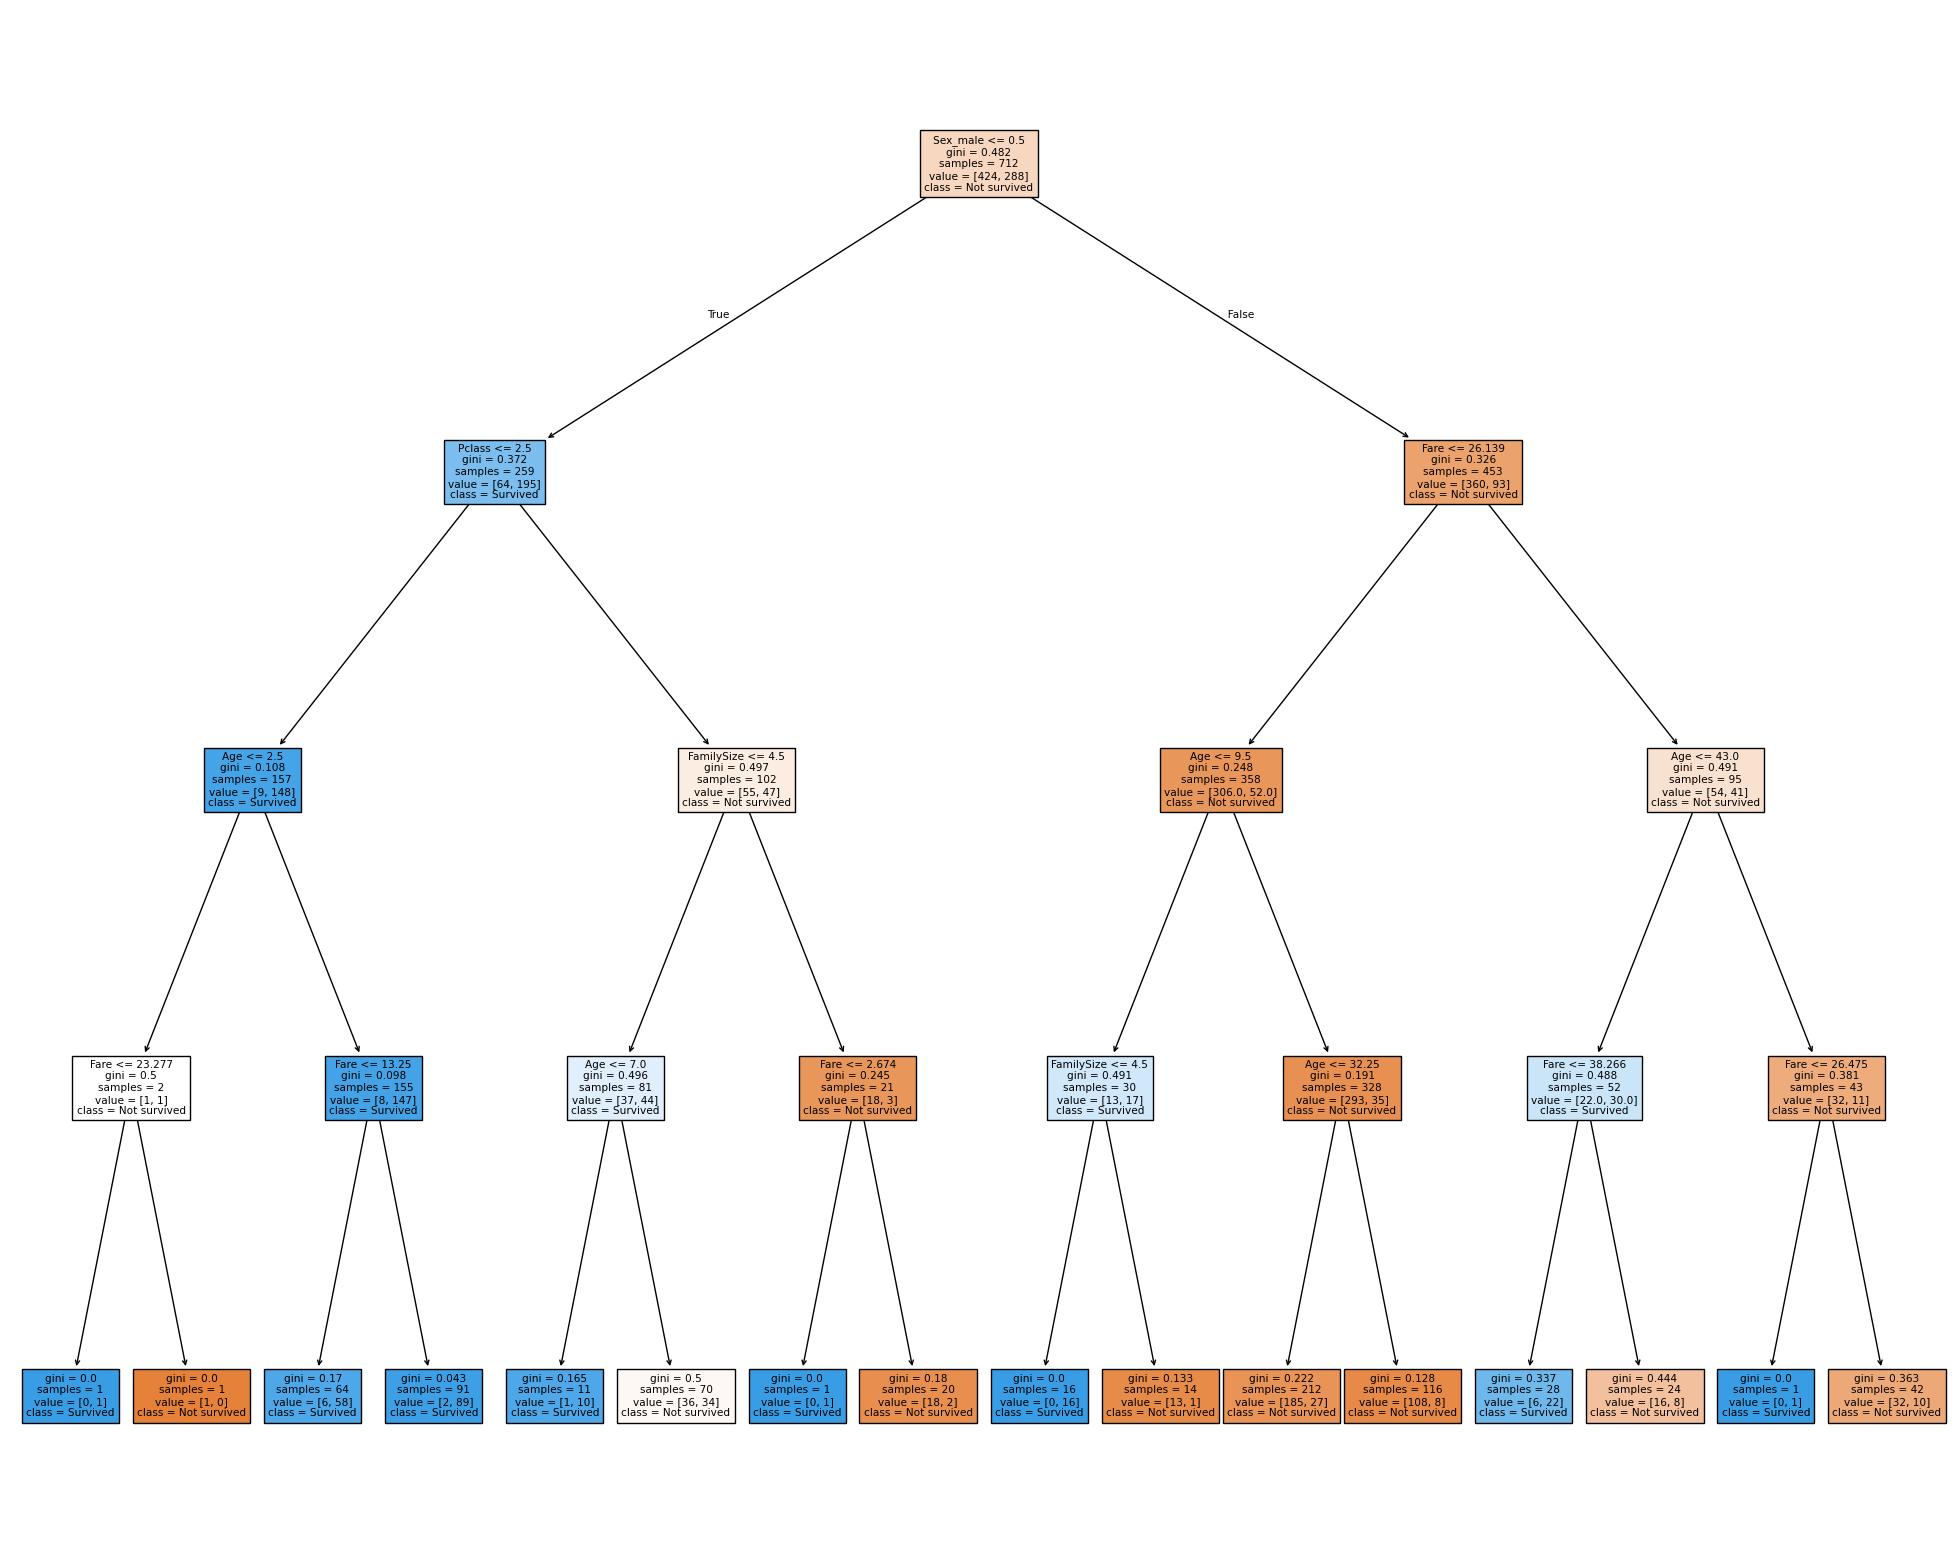

In [30]:
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(
    model,
    feature_names=X.columns.tolist(),
    class_names=["Not survived", "Survived"],
    filled=True
)

**3.2 Arbre de classification (profondeur ≤ 4) : construction et interprétation**

Afin de dégager les règles les plus significatives, nous commentons deux sous-arbres clés :

|       Nœud | Critère         | Échantillon | Classe majoritaire | Proportion majoritaire |
| ---------: | --------------- | ----------: | ------------------ | ---------------------: |
| **Racine** | Sex\_male ≤ 0,5 |         712 | Non-survécu (60 %) |              424 / 712 |
|  **Femme** | Pclass ≤ 2,5    |         259 | Survivante (62 %)  |              159 / 259 |
|  **Homme** | Fare ≤ 26,16    |         453 | Non-survécu (80 %) |              360 / 453 |

**Interprétation du nœud racine**

La séparation la plus pure (gini = 0,482) s’effectue sur `Sex_male`. Les femmes (Sex\_male = 0) sont dirigées vers la sous-branche gauche, où 62 % survivent, tandis que 80 % des hommes (Sex\_male = 1) basculent vers la branche droite et n’ont pas survécu. Cela reflète la règle « femmes et enfants d’abord » combinée à la surreprésentation masculine à bord.

**Sous-arbre “Femmes” (gauche)**

Le deuxième critère, `Pclass ≤ 2,5`, distingue les femmes de première et deuxième classes (n = 259) des femmes de troisième classe (n = 29).
* Pour les femmes de 1ʳᵉ/2ᵉ classe, l’arbre affine encore sur l’âge : `Age ≤ 2,5` regroupe les très jeunes enfants (tous survivants), tandis que pour `Age > 2,5` le tarif (`Fare ≤ 13,25`) segmente à nouveau entre taux de survie élevé (71 %) et plus faible (38 %).
* Les femmes de troisième classe sont moins nombreuses (n = 29) et forment une feuille où la prédiction « Survécu » l’emporte à 55 %.

**Sous-arbre “Hommes” (droite)**

Après avoir isolé les hommes, le critère `Fare ≤ 26,16` sépare les billets bon marché (n = 453) des billets plus onéreux (n = -).

* Dans le groupe des billets bon marché, `Age ≤ 9,5` identifie un petit sous-groupe d’enfants (taux de survie 7 %), alors que `Age > 9,5` conduit à une feuille « Non-survécu » à 85 %.
* Pour les hommes ayant payé plus de 26 £, l’arbre utilise `Age ≤ 43` puis `Fare ≤ 38,27` pour distinguer trois comportements :

1. `Fare ≤ 38,27` et `Age ≤ 43` : taux de survie 30 %.
2. `Fare > 38,27` et `Age ≤ 7,5` : très faible effectif mais 100 % de survie (petits groupes d’enfants accompagnés).
3. Le reste forme une feuille « Non-survécu » à 85 %.

La **taille de la famille**

(`FamilySize ≤ 4,5`) intervient également dans deux nœuds de profondeur 3, suggérant qu’au-delà de quatre personnes, la prédiction bascule souvent en « Non-survécu » (effet de ralentissement logistique dû à la coordination du groupe).

**Importance relative des variables**

| Rang | Variable      | Importance (reduction de Gini) |
| ---: | ------------- | -----------------------------: |
|    1 | Sex\_male     |                           0,48 |
|    2 | Fare          |                           0,23 |
|    3 | Pclass        |                           0,16 |
|    4 | Age           |                           0,09 |
|    5 | FamilySize    |                           0,04 |
|    – | Embarked\_Q/S |                            ≃ 0 |

Cette importance confirme la hiérarchie dévoilée par l’arbre : le sexe reste la clef de voûte de la décision, suivi du tarif et du rang social, puis de l’âge et, dans une moindre mesure, de la taille familiale.

**Conclusion de la Q2**

L’arbre de décision met en lumière des interactions conditionnelles impossibles à capter par un modèle linéaire :

* l’effet protecteur très fort des jeunes enfants,
* le rôle modérateur du tarif au sein de chaque sexe,
* l’influence cumulative du rang et de la taille familiale.
  Il complète la régression logistique en révélant des niches de survie (par exemple, hommes riches et jeunes) et des sous-groupes particulièrement vulnérables (hommes pauvres de plus de 9,5 ans).
